# 1 - Packages

In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
from time import time 
%matplotlib inline

# 2 - Dataset

In [2]:
def loadDatas(direction):
    """
    Loading image datas from the the same folder.

    Arguments:
    direction -- A direction of image data from the same folder.

    Return:
    np.array(imageList) -- Data in the form of numpy.
    """
    imageList=[]
    list = os.listdir(direction)
    for item in list:
        path = os.path.join(direction, item) # 把list裡面的檔名加到路徑
        if(os.path.isfile(path)):
            img = cv2.imread(path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (1600, 800)) # resize到網絡input的shape
            
            imageList.append(img)
    return np.array(imageList)

In [3]:
tic = time()
data = loadDatas("datasets")
toc = time()
print ('execute time: ' + str((toc - tic)) + ' sec')
print ("Shape of data: " + str(data.shape))

execute time: 82.57970428466797 sec
Shape of data: (2176, 800, 1600, 3)


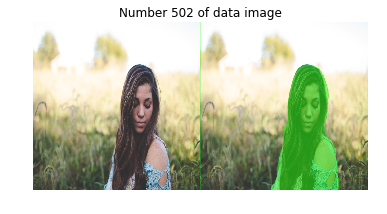

In [7]:
imgIdx = 501
plt.title("Number %d of data image" % (imgIdx + 1))
plt.imshow(data[imgIdx,:,:,:])
plt.axis('off')
plt.show()

In [8]:
def splitData2XY(data):
    """
    Split data into X and Y, because each of image data contain X_train in left half, Y_predic in right half.

    Arguments:
    data -- A dataset from loadDatas

    Return:
    X_pre, Y_pre -- X_pre, Y_pre without preprocessing
    """
    assert np.array([data.shape]).shape == (1, 4)
    X_pre = data[:,:,:800,:]
    Y_pre = data[:,:,800:1600,:]
    
    assert X_pre.shape == (data.shape[0], data.shape[1], data.shape[2]/2,data.shape[3])
    assert Y_pre.shape == (data.shape[0], data.shape[1], data.shape[2]/2,data.shape[3])
    
    return X_pre, Y_pre

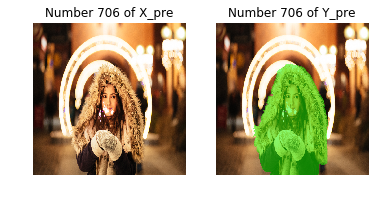

In [9]:
X_pre, Y_pre = splitData2XY(data)

plt.subplot(1,2,1)
imgIdx = 705
plt.title("Number %d of X_pre" % (imgIdx + 1))
plt.imshow(X_pre[imgIdx,:,:,:])
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Number %d of Y_pre" % (imgIdx + 1))
plt.imshow(Y_pre[imgIdx,:,:,:])
plt.axis('off')
plt.show()

# 3 - Create .h5

In [28]:
from time import time 
tic = time()

file = h5py.File('dataset.h5', 'w')
file.create_dataset('X_pre', data = X_pre)
file.create_dataset('Y_pre', data = Y_pre)
file.close()

toc = time()
print ('execute time: ' + str((toc - tic)) + ' sec')

execute time: 18.91905117034912 sec


In [2]:
from time import time 
tic = time()

file = h5py.File('dataset.h5', 'r')
X_pre = file['X_pre'][:]
Y_pre = file['Y_pre'][:]
file.close()

toc = time()
print ('execute time: ' + str((toc - tic)) + ' sec')

execute time: 3.171485424041748 sec


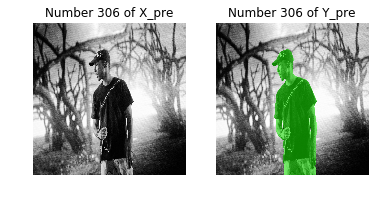

In [4]:
plt.subplot(1,2,1)
imgIdx = 305
plt.title("Number %d of X_pre" % (imgIdx + 1))
plt.imshow(X_pre[imgIdx,:,:,:])
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Number %d of Y_pre" % (imgIdx + 1))
plt.imshow(Y_pre[imgIdx,:,:,:])
plt.axis('off')
plt.show()